In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
tf.__version__

'2.13.0'

In [38]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)


In [39]:
train=training_datagenarator.flow_from_directory(r"C:\Users\Anudeep P\Downloads\training_data",
                                                target_size=(32,32 ),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory(r"C:\Users\Anudeep P\Downloads\training_data",
                                                target_size=(32,32),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 14638 images belonging to 2 classes.
Found 1626 images belonging to 2 classes.


In [40]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [41]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 64)         

In [42]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r"C:\Users\Anudeep P\Downloads\model1\Fire_and_Smoke_model.h5",
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [43]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=10,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

C:\Users\Anudeep P\AppData\Local\Temp\ipykernel_4160\3336537625.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,validation_data=validation,epochs=10,


Epoch 1/10
914/914 [==============================] - 196s 213ms/step - loss: 0.1222 - accuracy: 0.9585 - val_loss: 0.0569 - val_accuracy: 0.9777
Epoch 2/10


C:\Users\Anudeep P\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


914/914 [==============================] - 413s 452ms/step - loss: 0.0665 - accuracy: 0.9788 - val_loss: 0.0464 - val_accuracy: 0.9845
Epoch 3/10
914/914 [==============================] - 228s 249ms/step - loss: 0.0589 - accuracy: 0.9812 - val_loss: 0.0481 - val_accuracy: 0.9864
Epoch 4/10
914/914 [==============================] - 216s 236ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0302 - val_accuracy: 0.9938
Epoch 5/10
914/914 [==============================] - 220s 240ms/step - loss: 0.0520 - accuracy: 0.9835 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 6/10
914/914 [==============================] - 218s 239ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0396 - val_accuracy: 0.9901
Epoch 7/10
914/914 [==============================] - 218s 239ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0307 - val_accuracy: 0.9920
Epoch 8/10
914/914 [==============================] - 223s 244ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.0482 - val_accura

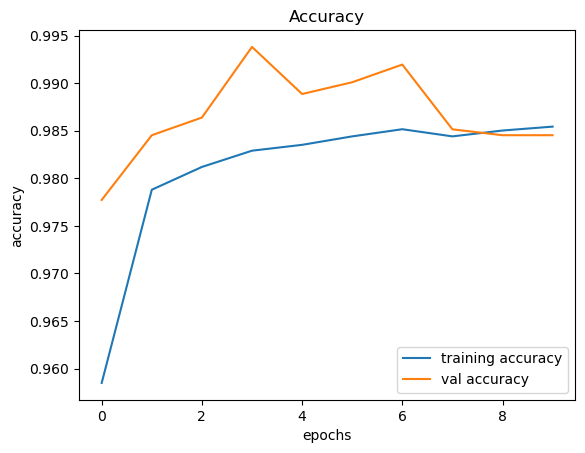

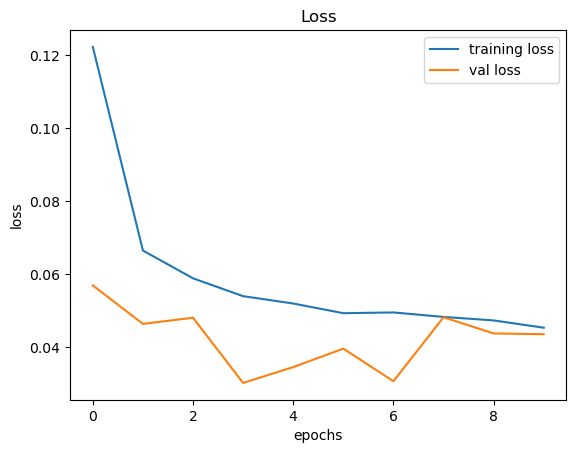

In [44]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(cnn.history.history['accuracy'], label='training accuracy')
plt.plot(cnn.history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(cnn.history.history['loss'], label='training loss')
plt.plot(cnn.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

conv2d_6
16


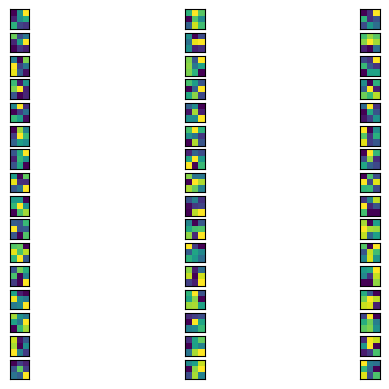

conv2d_7
32


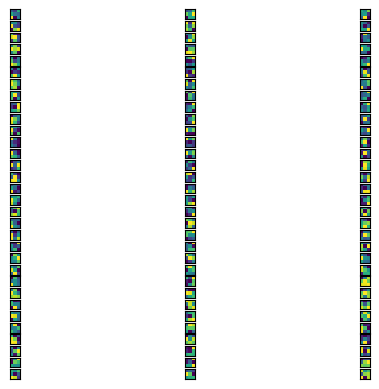

conv2d_8
64


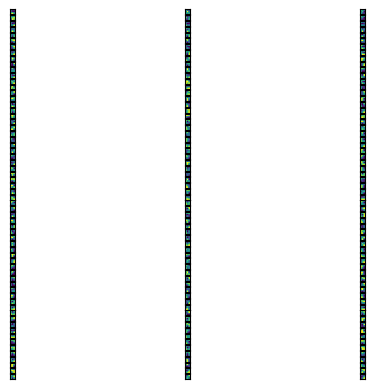

In [45]:
#Iterate through all the layers of the model
import matplotlib.pyplot as plt
for layer in cnn.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

1/1 [==============================] - 0s 95ms/step
(1, 16, 16, 16)
(1, 16, 16, 32)


C:\Users\Anudeep P\AppData\Local\Temp\ipykernel_4160\1594478968.py:25: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
C:\Users\Anudeep P\AppData\Local\Temp\ipykernel_4160\1594478968.py:28: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


(1, 8, 8, 32)
(1, 8, 8, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 128)
(1, 1)


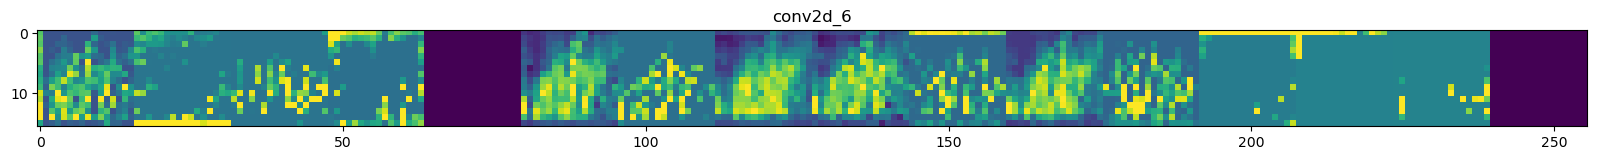

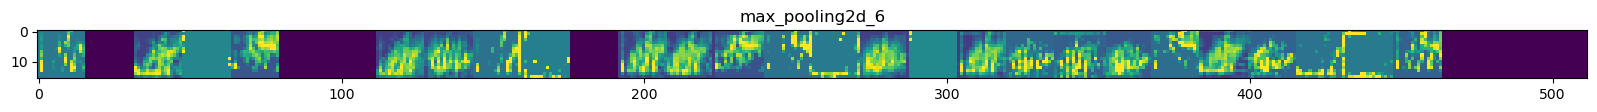

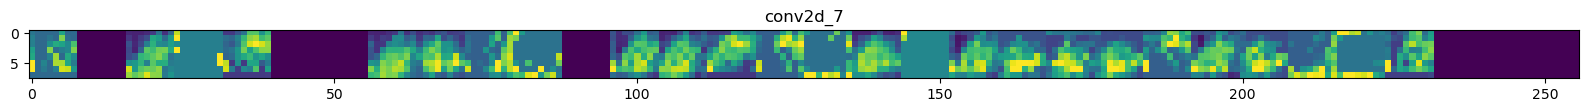

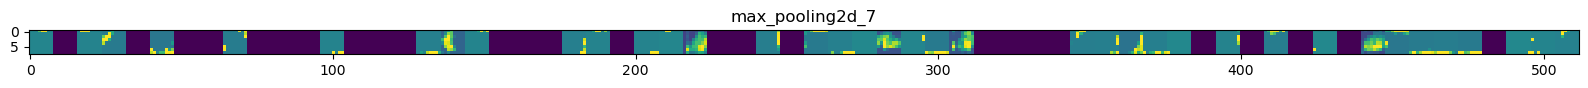

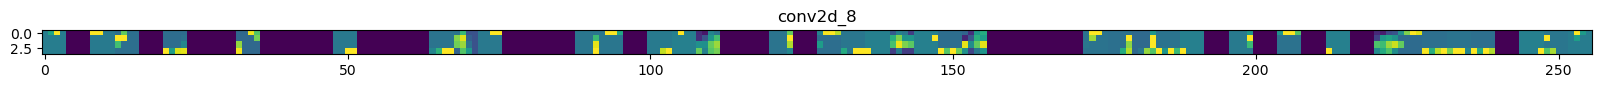

In [46]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
img_path=r"C:\Users\Anudeep P\Downloads\training_data\fire\Fire (13).jpg" 

successive_outputs = [layer.output for layer in cnn.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = cnn.input, outputs = successive_outputs)
img = load_img(img_path, target_size=(32,32))

x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)

x /= 255.0
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in cnn.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size       = feature_map.shape[ 1]  

    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [47]:
# Choose an image to visualize its feature maps
img_path = r"C:\Users\Anudeep P\Downloads\training_data\fire\Fire (13).jpg" 
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32,32))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [49]:
layer_names = ['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'conv2d_8', 'max_pooling2d_8', 'flatten_2', 'dense_4', 'dense_5']

visualization_model = tf.keras.models.Model(inputs=cnn.input, outputs=[cnn.get_layer(layer_name).output for layer_name in layer_names])

feature_maps = visualization_model.predict(img_array)


1/1 [==============================] - 0s 77ms/step


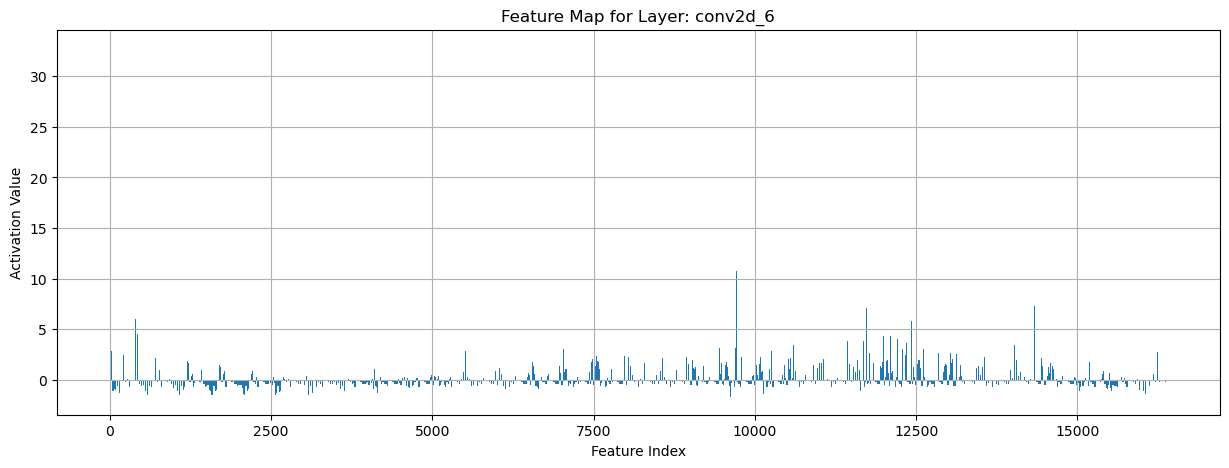

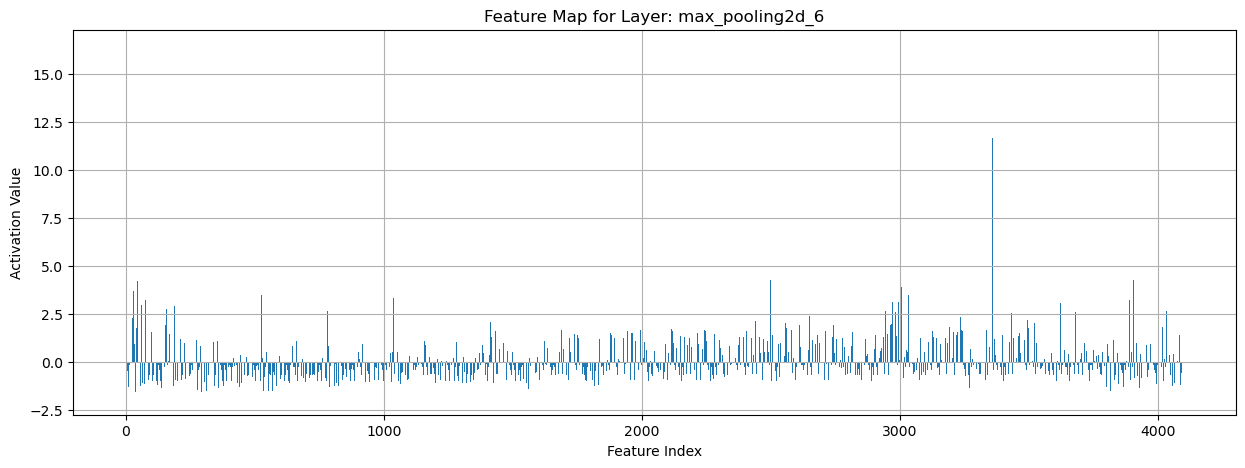

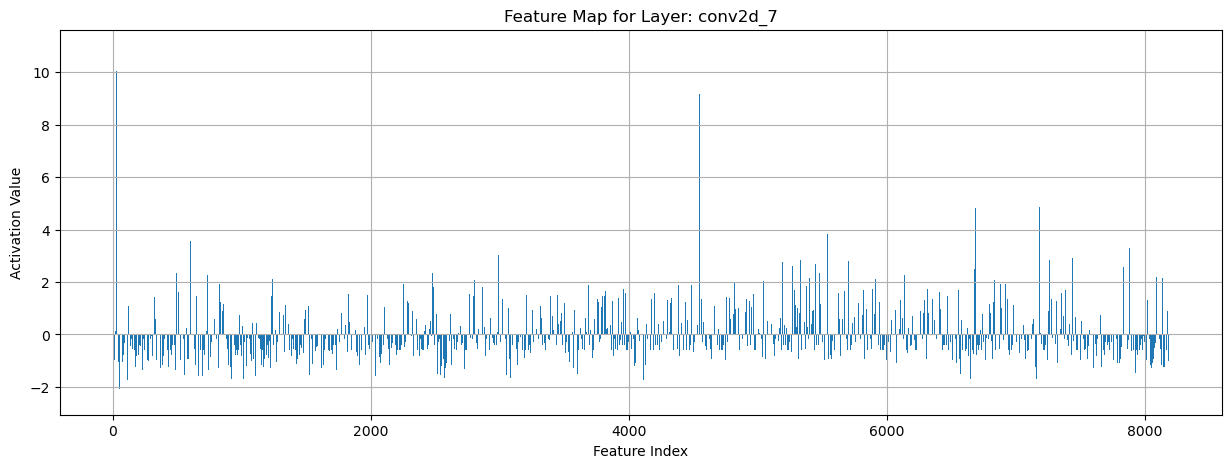

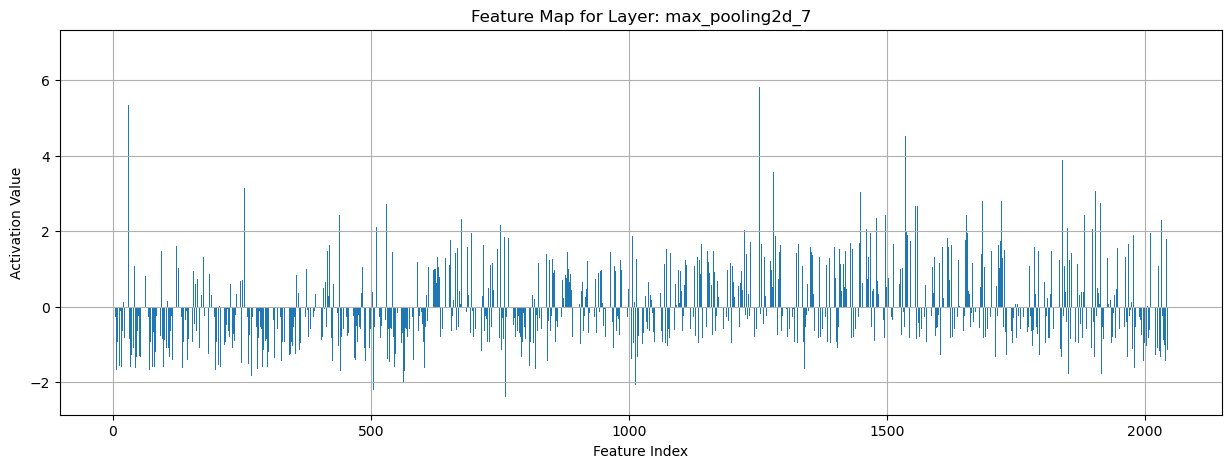

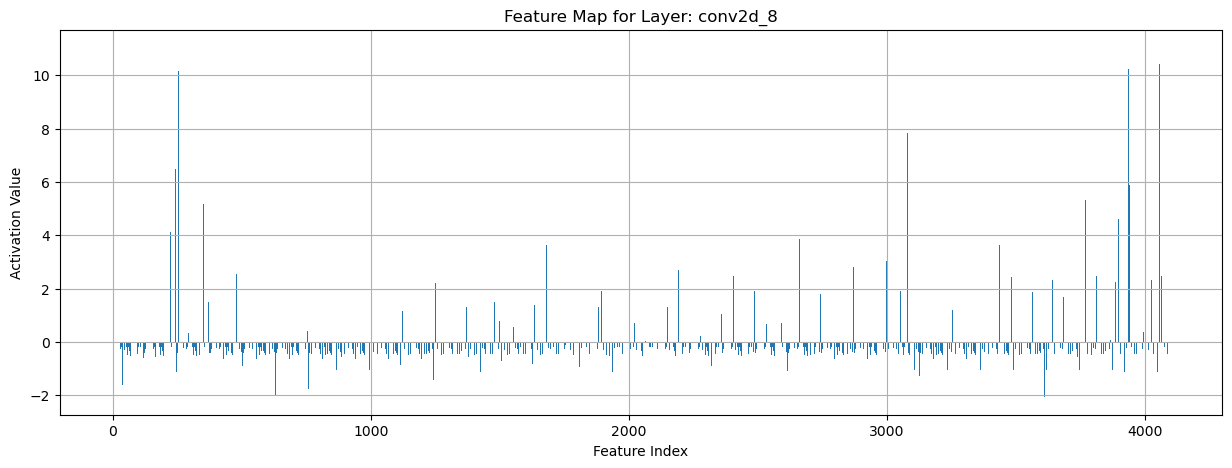

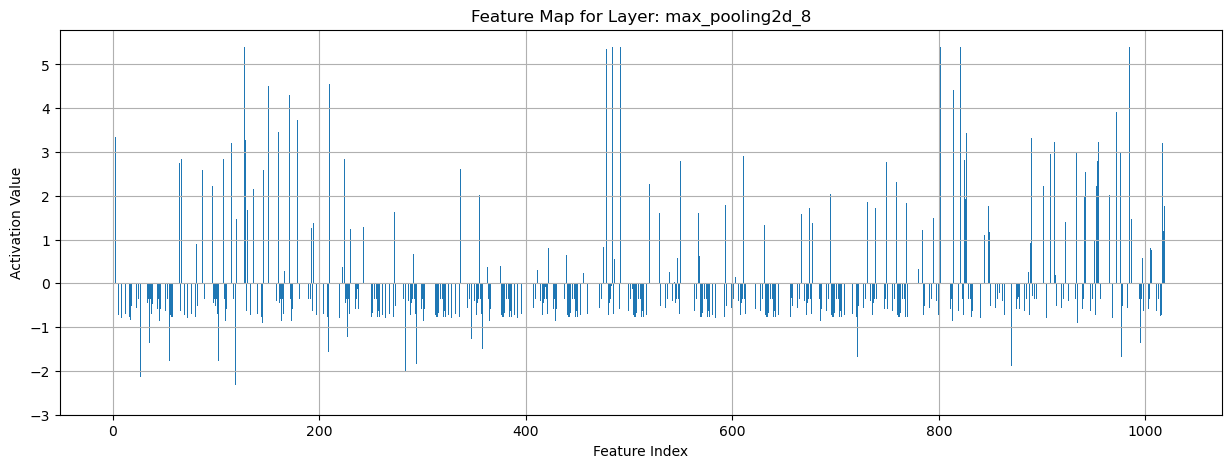

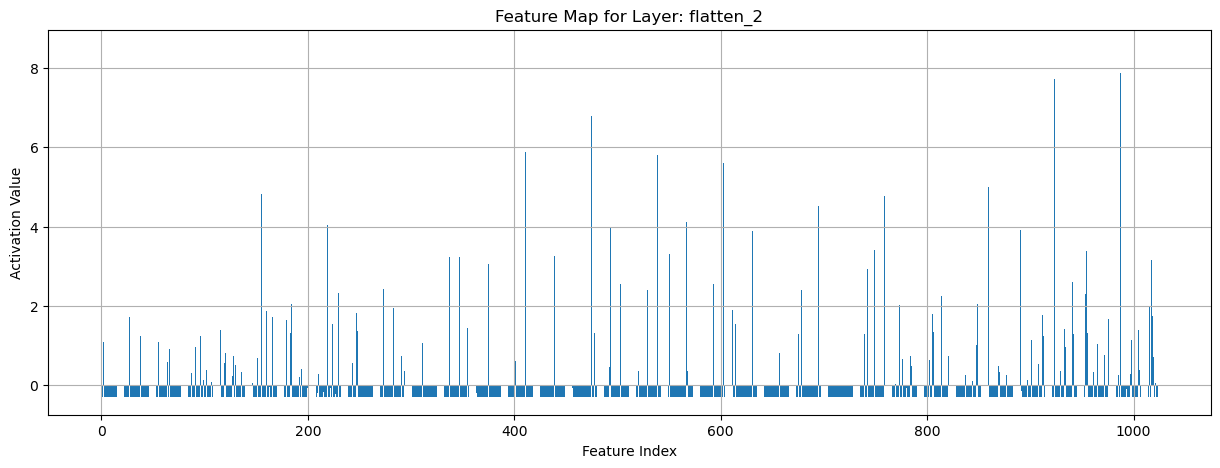

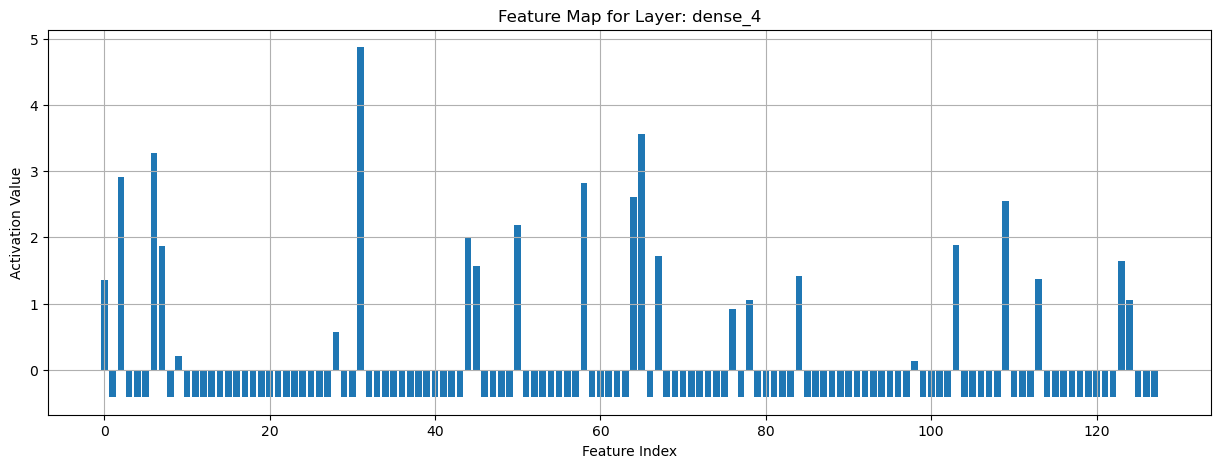

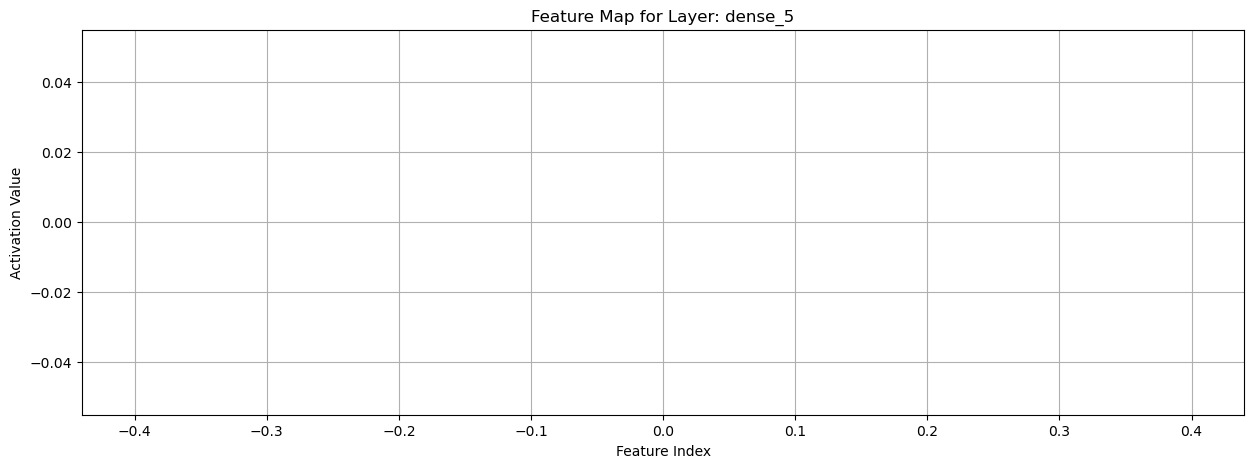

In [87]:
import matplotlib.pyplot as plt
import numpy as np

epsilon = 1e-4
for layer_name, feature_map in zip(layer_names, feature_maps):
    feature_map = feature_map.flatten()  # Flatten the 2D array to 1D
    
    # Normalize the feature map values
    feature_map -= feature_map.mean()  
    feature_map /= (feature_map.std() + epsilon)  # Normalize to avoid extreme values
    
    # Create a bar chart for the feature map
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(feature_map)), feature_map)
    plt.title(f"Feature Map for Layer: {layer_name}")
    plt.xlabel("Feature Index")
    plt.ylabel("Activation Value")
    plt.grid(True)
    plt.show()


In [96]:
# Load the trained model
from tensorflow.keras.models import load_model
cnn = load_model(r"C:\Users\Anudeep P\Downloads\model1\Fire_and_Smoke_model.h5")

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

# Update the image path to the fire image for testing
image_for_testing = r"C:\Users\Anudeep P\Downloads\training_data\fire\Fire (10).jpg" 

test_image = image.load_img(image_for_testing, target_size=(32, 32)) 
test_image = image.img_to_array(test_image)  
test_image = test_image / 255 
test_image = np.expand_dims(test_image, axis=0)


In [97]:
# Predict the category (Smoke or Fire)
result = cnn.predict(test_image)
categories = ['Smoke', 'Fire']  # Define the categories based on the model's output


1/1 [==============================] - 0s 54ms/step


In [98]:
# Confidence threshold logic
confidence = result[0][0]  # Get the confidence of the predicted class
predicted_category = categories[int(confidence < 0.5)]  # If confidence < 0.5, reverse the prediction
predicted_confidence = abs(confidence - 1)  # Calculate the confidence for the opposite class


In [99]:
import datetime

# Define file path to store results
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
result_file_path = f"C:/Users/Anudeep P/Downloads/model1/prediction_results_{timestamp}.txt"

with open(result_file_path, 'w') as f:
    f.write(f"Prediction for image: {image_for_testing}\n") 
    f.write(f"Predicted Category: {predicted_category}\n") 
    f.write(f"Model Confidence: {predicted_confidence:.4f}\n")  
    f.write(f"Timestamp: {timestamp}\n") 


1/1 [==============================] - 0s 28ms/step


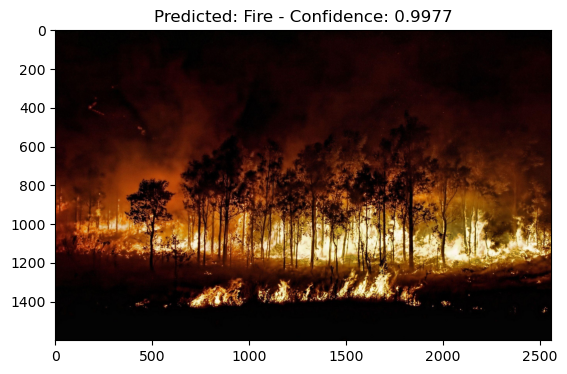

1/1 [==============================] - 0s 33ms/step


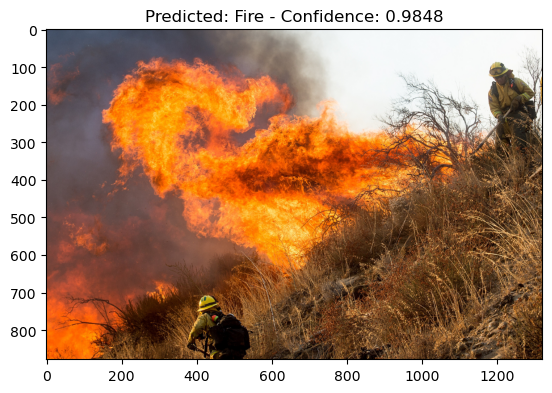

1/1 [==============================] - 0s 33ms/step


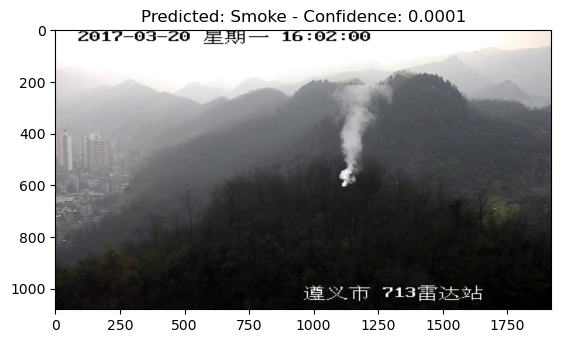

1/1 [==============================] - 0s 50ms/step


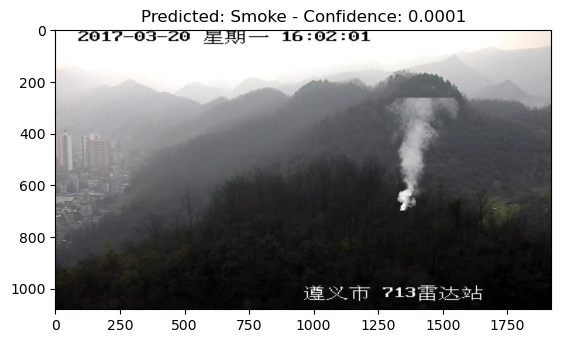

In [109]:
# List of fire and smoke images to test
test_images = [
    r"C:\Users\Anudeep P\Downloads\training_data\fire\Fire (5).jpg", 
    r"C:\Users\Anudeep P\Downloads\training_data\fire\Fire (12).jpg",
    r"C:\Users\Anudeep P\Downloads\training_data\smoke\Smoke (1947).jpg",
    r"C:\Users\Anudeep P\Downloads\training_data\smoke\Smoke (1950).jpg"
]

# Loop through the test images and predict for each
for image_path in test_images:
    # Load and preprocess the image
    test_image = image.load_img(image_path, target_size=(32, 32))
    test_image = image.img_to_array(test_image)
    test_image = test_image / 255 
    test_image = np.expand_dims(test_image, axis=0)
    
    # Make prediction
    result = cnn.predict(test_image)
    
    # Confidence threshold logic
    confidence = result[0][0]
    predicted_category = categories[int(confidence < 0.5)]  
    predicted_confidence = abs(confidence - 1) 

    image_show = PIL.Image.open(image_path)
    plt.imshow(image_show)
    plt.title(f"Predicted: {predicted_category} - Confidence: {predicted_confidence:.4f}")
    plt.show()

    timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    result_file_path = f"C:/Users/Anudeep P/Downloads/model1/prediction_results_{timestamp}.txt"
    
    with open(result_file_path, 'w') as f:
        f.write(f"Prediction for image: {image_path}\n")
        f.write(f"Predicted Category: {predicted_category}\n")
        f.write(f"Model Confidence: {predicted_confidence:.4f}\n")
        f.write(f"Timestamp: {timestamp}\n")
